### Explore Weather Trends (Los Angeles, CA & Global):
1. Create a `line chart` that compares your `city’s temperatures` with the `global temperatures` and `plot` the `moving average` rather than the yearly averages in order to `smooth out` the lines, making trends more observable 
2. Make `observations` about the similarities and `differences` between the `world averages` and your `city’s averages`, as well as `overall trends`. 

_a: "Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?"_  Los Angeles temperatures were hotter on average compared to global average and this has been consistent over the entire dataset.
<br>
<br>
_b. “How do the changes in your city’s temperatures over time compare to the changes in the global average?”_ The `mean()` of both Pandas Series for local and global temperatures was `8` so the difference in Celsius temperature averaged about an `8` degree difference between them. While the variance taken on the average temperatures within each dataset varied `32%` for local data and `34%` for global data. So changes within each dataset was very similar and mean shows almost a 10 degree difference between average temperatures.
<br>
<br>
_c. "What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?"_ Looking at the results from deriving a slope of both datasets, city trend was `0.005113830043010149` while global trend was `0.008314695589453166` which shows Los Angeles, CA is trending a bit higher than global temperatures. This has been consistent over the few hundred years from viewing the steadily increasing line in the line chart.


In [158]:
import pandas as pd
import numpy as np

import matplotlib 
from matplotlib import style, figure
from IPython.display import HTML

city_data = pd.read_csv('city_data.csv')
global_data = pd.read_csv('global_data.csv')

In [159]:
def fahrenheit(avg_temp): 
    fahrenheit = 9.0/5.0 * avg_temp + 32
    return fahrenheit

In [160]:
fahrenheit(city_data['avg_temp'])

0      60.278
1      59.504
2      59.954
3      60.098
4      61.286
5      60.332
6      60.692
7      59.936
8      61.142
9      60.206
10     59.522
11     59.738
12     61.718
13     60.890
14     60.584
15     61.916
16     60.602
17     61.394
18     61.718
19     60.962
20     60.890
21     60.152
22     60.602
23     60.188
24     60.260
25     59.594
26     61.142
27     60.260
28     61.232
29     59.792
        ...  
135    62.168
136    60.728
137    61.700
138    60.962
139    61.592
140    61.448
141    61.466
142    60.800
143    62.222
144    61.448
145    61.322
146    61.952
147    62.744
148    62.474
149    59.666
150    61.016
151    61.952
152    61.646
153    61.574
154    62.492
155    61.790
156    61.574
157    61.916
158    62.060
159    62.618
160    62.024
161    60.602
162    60.566
163    62.762
164    64.616
Name: avg_temp, Length: 165, dtype: float64

In [161]:
fahrenheit(global_data['avg_temp'])

0      47.696
1      46.364
2      42.404
3      47.102
4      47.246
5      47.048
6      47.930
7      48.236
8      44.132
9      46.382
10     44.942
11     47.786
12     47.498
13     45.500
14     47.120
15     46.850
16     47.138
17     46.796
18     44.204
19     45.842
20     45.842
21     46.130
22     46.742
23     46.796
24     47.786
25     48.524
26     46.940
27     46.868
28     47.372
29     48.164
        ...  
236    47.894
237    48.182
238    48.560
239    48.056
240    48.614
241    48.524
242    47.912
243    47.966
244    48.272
245    48.830
246    48.272
247    48.560
248    49.136
249    48.722
250    48.560
251    48.938
252    49.226
253    49.154
254    48.776
255    49.460
256    49.154
257    49.514
258    48.974
259    49.118
260    49.460
261    49.136
262    49.118
263    49.298
264    49.226
265    49.694
Name: avg_temp, Length: 266, dtype: float64

In [162]:
global_data["fahrenheit"] = farenheit(global_data['avg_temp'])
global_data['fahrenheit'] = round(global_data['fahrenheit'])

global_data.drop(global_data.head(99).index,inplace=True) # drop first n rows to align with Los Angeles rows
global_data.drop(global_data.tail(2).index,inplace=True) # drop last n rows to align with Los Angeles rows
global_data.shape

(165, 3)

In [163]:
city_data["fahrenheit"] = farenheit(city_data['avg_temp'])
city_data['fahrenheit'] = round(city_data['fahrenheit'])
city_data.shape

(165, 3)

In [164]:
a = global_data['fahrenheit']
b = city_data['fahrenheit']
diff = b.sub(a)
print("the mean taken for both city and global datasets was: ", round(diff.mean(skipna = True)))

the mean taken for both city and global datasets was:  14


In [165]:
def slope(data, order=1): # cite 
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

slope_city = slope(city_data['avg_temp'])
slope_global = slope(global_data['avg_temp'])

print('city trend: ', slope_city, 'global trend: ', slope_global)

# cite: https://stackoverflow.com/questions/42920537/finding-increasing-trend-in-pandas

city trend:  0.005113830043010149 global trend:  0.008314695589453166


In [166]:
city_year = city_data['year']
global_year = global_data['year']

print('city: ', city_year.tail(), 'global: ', global_year.tail())

city:  160    2009
161    2010
162    2011
163    2012
164    2013
Name: year, dtype: int64 global:  259    2009
260    2010
261    2011
262    2012
263    2013
Name: year, dtype: int64


In [167]:
city_data.var()

year          2282.500000
avg_temp         0.323481
fahrenheit       1.089653
dtype: float64

In [168]:
global_data.var()

year          2282.500000
avg_temp         0.211752
fahrenheit       0.772579
dtype: float64

In [169]:
city_year = city_data['year']
city_avg_temp = city_data['fahrenheit']

global_year = global_data['year']
global_avg_temp = global_data['fahrenheit']

print('city: ', city_year.tail(), 'global: ', global_year.tail())

city:  160    2009
161    2010
162    2011
163    2012
164    2013
Name: year, dtype: int64 global:  259    2009
260    2010
261    2011
262    2012
263    2013
Name: year, dtype: int64


In [170]:
print('city_avg_temp: ', city_avg_temp)
print('global_avg_temp: ', global_avg_temp)

city_avg_temp:  0      60.0
1      60.0
2      60.0
3      60.0
4      61.0
5      60.0
6      61.0
7      60.0
8      61.0
9      60.0
10     60.0
11     60.0
12     62.0
13     61.0
14     61.0
15     62.0
16     61.0
17     61.0
18     62.0
19     61.0
20     61.0
21     60.0
22     61.0
23     60.0
24     60.0
25     60.0
26     61.0
27     60.0
28     61.0
29     60.0
       ... 
135    62.0
136    61.0
137    62.0
138    61.0
139    62.0
140    61.0
141    61.0
142    61.0
143    62.0
144    61.0
145    61.0
146    62.0
147    63.0
148    62.0
149    60.0
150    61.0
151    62.0
152    62.0
153    62.0
154    62.0
155    62.0
156    62.0
157    62.0
158    62.0
159    63.0
160    62.0
161    61.0
162    61.0
163    63.0
164    65.0
Name: fahrenheit, Length: 165, dtype: float64
global_avg_temp:  99     46.0
100    46.0
101    47.0
102    47.0
103    46.0
104    47.0
105    47.0
106    46.0
107    46.0
108    47.0
109    47.0
110    46.0
111    46.0
112    46.0
113    47.0
114    4

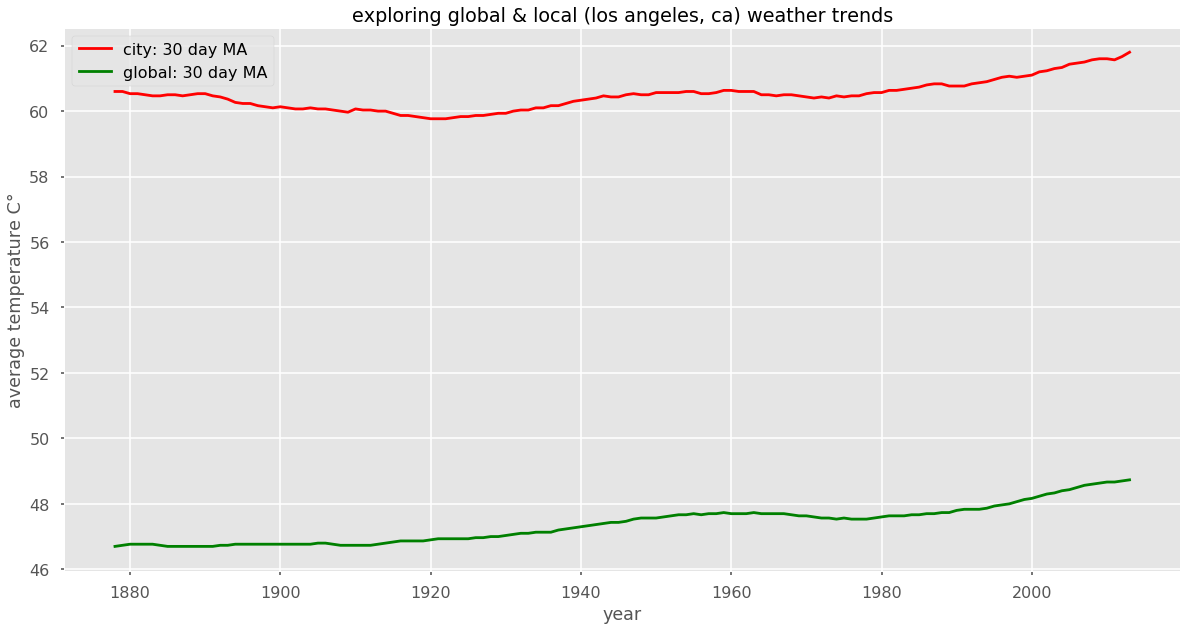

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 17})

plt.figure(figsize=(20,10))

plt.plot(city_year, city_avg_temp.rolling(window=30).mean(), 'r-', label='city: 30 day MA')
plt.plot(global_year, global_avg_temp.rolling(window=30).mean(), 'g-', label='global: 30 day MA')
plt.legend(loc='best')

plt.xlabel('year')
plt.ylabel('average temperature C°')
plt.title('exploring global & local (los angeles, ca) weather trends')

style.use('seaborn-poster')
plt.show()

In [ ]:
#cite: https://towardsdatascience.com/implementing-moving-averages-in-python-1ad28e636f9d